In [111]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [164]:
# Constantes
nu  =  0.8    # Coeficiente de fricción 
c   =  300000        # km/S
k   =  1 # Boltzmann
U   =  np.linspace(c,0,0,0)    # Velocidad del baño térmico
m   =  2.0 #masa
D   = 10000 #Coeficiente de difusión
q= 0.05 #carga
B=35 #Campo magnético
v01= 2000
v02= 1500
v03= 1000
vv0=v01**2+v02**2+v03**2
G0=1/np.sqrt(1-(vv0/c**2)) #Gamma inicial

etalista=[[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]
eta=np.array(etalista)
print(eta)
             

[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


In [165]:
ubetalista=[G0*c,G0*v01,G0*v02,G0*v03]
ub0=np.array(ubetalista)
print(ub0)

[300012.08406342   2000.08056042   1500.06042032   1000.04028021]


In [166]:
ualfalista=[-G0*c,G0*v01,G0*v02,G0*v03]
ua0=np.array(ualfalista)
print(ua0)

[-300012.08406342    2000.08056042    1500.06042032    1000.04028021]


In [167]:
d=4
nu0 = np.zeros((d,d))
for i in range (4):
    for j in range (4):
        nu0[i,j]=nu*(eta[i,j]+((ub0[i]*ua0[j])/c**2))

print(nu0)
        

[[-6.44496362e-05  5.33376300e-03  4.00032225e-03  2.66688150e-03]
 [-5.33376300e-03  8.00035558e-01  2.66688150e-05  1.77792100e-05]
 [-4.00032225e-03  2.66688150e-05  8.00020002e-01  1.33344075e-05]
 [-2.66688150e-03  1.77792100e-05  1.33344075e-05  8.00008890e-01]]


In [168]:
Flista=[[0,0,0,0],[0,0,B,0],[0,-B,0,0],[0,0,0,0]]
F=np.array(Flista)
print(F)

[[  0   0   0   0]
 [  0   0  35   0]
 [  0 -35   0   0]
 [  0   0   0   0]]


In [169]:
# Parametros de la simulación.
dt  = .01                     # Time step.
T   = 100               # Total time.
n   = int(T / dt)            # Number of time steps.
d   = 1+3                   # Dimensions

In [170]:
# Aqui configuro los valores inciales para poder iniciar la simulación, es necesario renombrarlos porque en el for van a cambiar de valor.
v1=np.zeros(n)
v2=np.zeros(n)
v3=np.zeros(n)
ub=ub0
ua=ua0
vv=np.zeros(n)
G=np.zeros(n)

v1[0]=v01
v2[0]=v02
v3[0]=v03
vv[0]=vv0
G[0]=G0

P=np.zeros((d,n))

P[0,0]=m*ub0[0]
P[1,0]=m*ub0[1]
P[2,0]=m*ub0[2]
P[3,0]=m*ub0[3]

X=np.zeros((d,n))

X[0,0]=0
X[1,0]=0
X[2,0]=0
X[3,0]=0

Beta1 = np.zeros(n)
Beta2 = np.zeros(n)
Beta3 = np.zeros(n)
Betaprima1 = np.zeros(n)
Betaprima2 = np.zeros(n)
Betaprima3 = np.zeros(n)
Beta = np.zeros(n)
Betaprima = np.zeros(n)

Pow = np.zeros(n)

Nu=nu0

In [171]:
for i in range(n -1):
    sigma = np.sqrt(2*D*G[i]*dt)
    mu = 0
    P[0,i+1]= P[0,i] - Nu[0,0]*(P[0,i]-m*c)*dt - Nu[0,1]*P[1,i]*dt - Nu[0,2]*P[2,i]*dt - Nu[0,3]*P[3,i]*dt + (F[0,0]*ub[0])*q*dt + (F[0,1]*ub[1])*q*dt + (F[0,2]*ub[2])*q*dt + (F[0,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
    P[1,i+1]= P[1,i] - Nu[1,0]*(P[0,i]-m*c)*dt - Nu[1,1]*P[1,i]*dt - Nu[1,2]*P[2,i]*dt - Nu[1,3]*P[3,i]*dt + (F[1,0]*ub[0])*q*dt + (F[1,1]*ub[1])*q*dt + (F[1,2]*ub[2])*q*dt + (F[1,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
    P[2,i+1]= P[2,i] - Nu[2,0]*(P[0,i]-m*c)*dt - Nu[2,1]*P[1,i]*dt - Nu[2,2]*P[2,i]*dt - Nu[2,3]*P[3,i]*dt + (F[2,0]*ub[0])*q*dt + (F[2,1]*ub[1])*q*dt + (F[2,2]*ub[2])*q*dt + (F[2,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
    P[3,i+1]= P[3,i] - Nu[3,0]*(P[0,i]-m*c)*dt - Nu[3,1]*P[1,i]*dt - Nu[3,2]*P[2,i]*dt - Nu[3,3]*P[3,i]*dt + (F[3,0]*ub[0])*q*dt + (F[3,1]*ub[1])*q*dt + (F[3,2]*ub[2])*q*dt + (F[3,3]*ub[3])*q*dt + np.random.normal(mu, sigma,1)
    
    v1[i+1]  = (m*P[1,i+1]*c)/P[0,i+1]
    v2[i+1]  = (m*P[2,i+1]*c)/P[0,i+1]
    v3[i+1]  = (m*P[3,i+1]*c)/P[0,i+1]
    
    X[0,i+1] = X[0,i] + (P[0,i]/m)*dt
    X[1,i+1] = X[1,i] + (P[1,i]/m)*dt
    X[2,i+1] = X[2,i] + (P[2,i]/m)*dt
    X[3,i+1] = X[3,i] + (P[3,i]/m)*dt
    
    vv[i+1] = ((v1[i+1]**2)+(v2[i+1]**2)+(v3[i+1]**2))
    G[i+1] = 1/np.sqrt(1-(vv[i+1]/c**2))
    
    
    ubetalista=[G[i+1]*c,G[i+1]*v1[i+1],G[i+1]*v2[i+1],G[i+1]*v3[i+1]]
    ub=np.array(ubetalista)
   
    ualfalista=[-G[i+1]*c,G[i+1]*v1[i+1],G[i+1]*v2[i+1],G[i+1]*v3[i+1]]
    ua=np.array(ualfalista)
    
    #########################################
    # Potencia
    #########################################
    
    Beta1[i] = v1[i]/c
    Betaprima1[i] = (Beta1[i+1]-Beta1[i])/dt
    Beta2[i] = v2[i]/c
    Betaprima2[i] = (Beta2[i+1]-Beta2[i])/dt
    Beta3[i] = v3[i]/c
    Betaprima3[i] = (Beta3[i+1]-Beta3[i])/dt
    
    Beta = np.asarray([Beta1[i],Beta2[i],Beta3[i]]) 
    Betaprima = np.asarray([Betaprima1[i],Betaprima2[i],Betaprima3[i]])
    
    Pow[i] = ((2*q**2*G[i]**6)/3*c)*(np.linalg.norm(Betaprima)-(np.linalg.norm(np.cross(Beta,Betaprima))))
    
    for k in range (4):
        for l in range (4):
            Nu[k,l]=nu*(eta[k,l]+((ub[k]*ua[l])/c**2)) 
            
#print(vv) 
#print('v1',v1)
#print('v2',v2)
#print('v3',v3)
#print('Nu',Nu)
#print('p',P)

In [186]:
t = np.arange(0, T , dt)

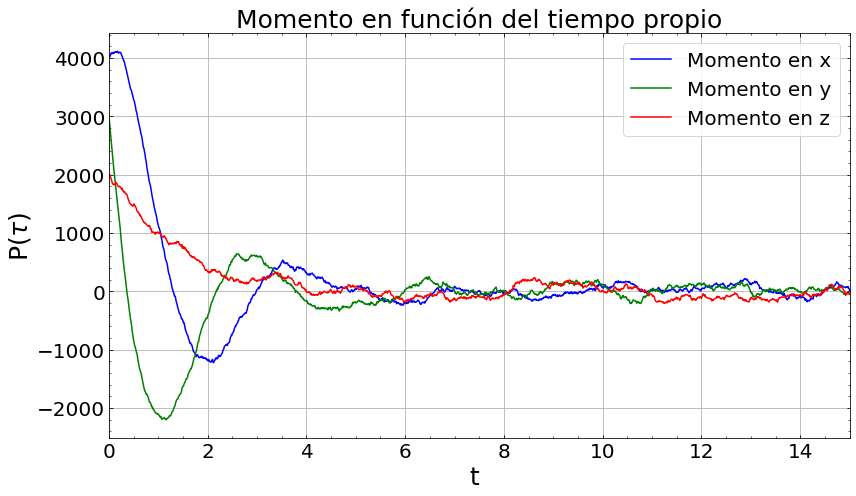

In [187]:
plt.figure(figsize=(12,7))
plt.plot(t, np.transpose( P[1]), 'b', label='Momento en x')
plt.plot(t, np.transpose( P[2]), 'g', label='Momento en y')
plt.plot(t, np.transpose( P[3]), 'r', label='Momento en z')
plt.title('Momento en función del tiempo propio',alpha=1 ,fontsize = '25', color='black')
plt.xlim([0,T*15/100])
plt.xlabel('t ',alpha=1 ,fontsize = '25', color='black')
plt.ylabel('P($\\tau$)',alpha=1 ,fontsize = '25', color='black')
plt.grid()
plt.legend(loc='upper right',fontsize=20)
plt.minorticks_on()
plt.tick_params(bottom=True,top=True,right=True,direction='in',which='both', labelsize = '20', color='black')
plt.tight_layout()
plt.savefig("3momentos.png",dpi=600)

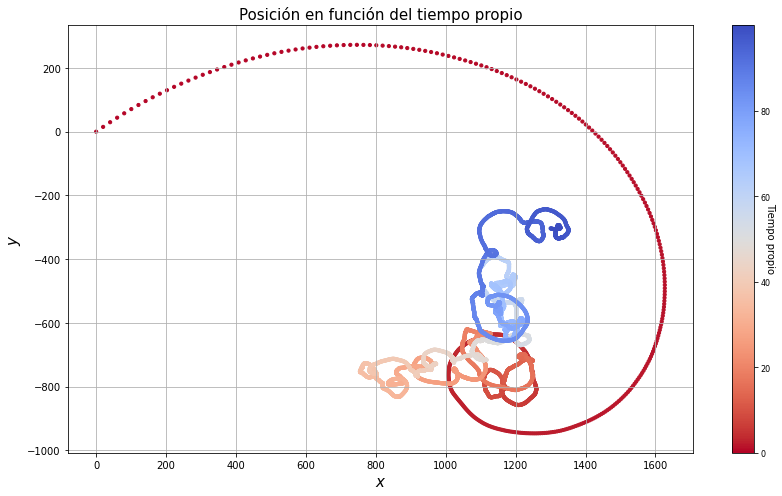

In [188]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()


x = X[1]
y = X[2]
#z = X[3]

color_map = plt.cm.get_cmap('coolwarm')
reversed_color_map = color_map.reversed()


im = ax.scatter(x, y,s=10,alpha=1,c=t,cmap=reversed_color_map)

# Get rid of colored axes planes
# First remove fill
#ax.xaxis.pane.fill = True
#ax.yaxis.pane.fill = True
#ax.zaxis.pane.fill = True

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('lightgray')
#ax.yaxis.pane.set_edgecolor('lightgray')
#ax.zaxis.pane.set_edgecolor('lightgray')

# Bonus: To get rid of the grid as well:
ax.grid(True)
plt.title('Posición en función del tiempo propio',alpha=1 ,fontsize = '15', color='black')
ax.set_xlabel('$x$',alpha=1 ,fontsize = '15', color='black')
ax.set_ylabel('$y$',alpha=1 ,fontsize = '15', color='black')
#ax.set_zlabel('$z$',alpha=1 ,fontsize = '15', color='black')

cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_ylabel('Tiempo propio ',fontsize=10 ,rotation=270)
plt.tight_layout()
plt.savefig("posicion2d.png",dpi=600)

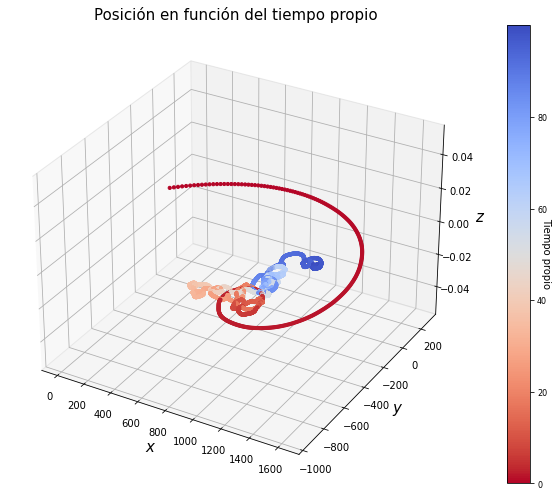

In [189]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection='3d')


x = X[1]
y = X[2]
z = X[3]

color_map = plt.cm.get_cmap('coolwarm')
reversed_color_map = color_map.reversed()


im = ax.scatter(x, y,s=10,alpha=1,c=t,cmap=reversed_color_map)

# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('lightgray')
ax.yaxis.pane.set_edgecolor('lightgray')
ax.zaxis.pane.set_edgecolor('lightgray')

# Bonus: To get rid of the grid as well:
ax.grid(True)
plt.title('Posición en función del tiempo propio',alpha=1 ,fontsize = '15', color='black')
ax.set_xlabel('$x$',alpha=1 ,fontsize = '15', color='black')
ax.set_ylabel('$y$',alpha=1 ,fontsize = '15', color='black')
ax.set_zlabel('$z$',alpha=1 ,fontsize = '15', color='black')

cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_ylabel('Tiempo propio ',fontsize=10 ,rotation=270)
plt.tight_layout()
plt.savefig("posicion3d.png",dpi=600)

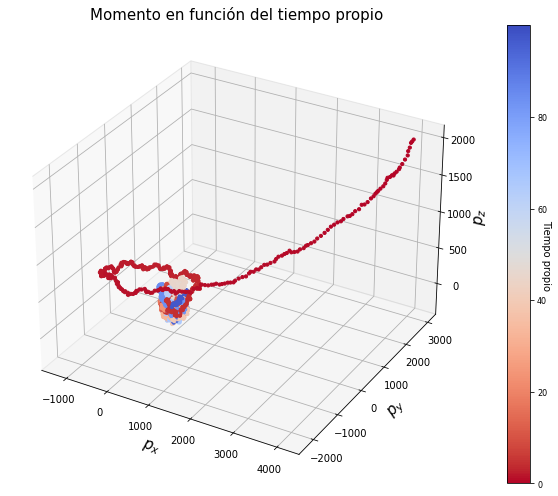

In [190]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(projection='3d')


x = P[1]
y = P[2]
z = P[3]

color_map = plt.cm.get_cmap('coolwarm')
reversed_color_map = color_map.reversed()


im = ax.scatter(x, y, z,s=10,alpha=1,c=t,cmap=reversed_color_map)
ax.set_title("Parametric Curve")
# Get rid of colored axes planes
# First remove fill
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('lightgray')
ax.yaxis.pane.set_edgecolor('lightgray')
ax.zaxis.pane.set_edgecolor('lightgray')

# Bonus: To get rid of the grid as well:
ax.grid(True)
plt.title('Momento en función del tiempo propio',alpha=1 ,fontsize = '15', color='black')
ax.set_xlabel('$p_x$',alpha=1 ,fontsize = '15', color='black')
ax.set_ylabel('$p_y$',alpha=1 ,fontsize = '15', color='black')
ax.set_zlabel('$p_z$',alpha=1 ,fontsize = '15', color='black')

cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_ylabel('Tiempo propio',fontsize=10 ,rotation=270)
plt.savefig("momento3d.png",dpi=600)


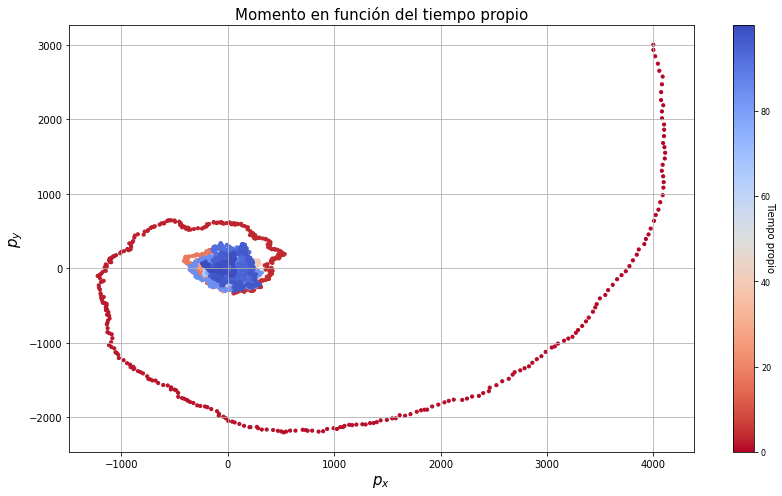

In [191]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()


x = P[1]
y = P[2]
#z = X[3]

color_map = plt.cm.get_cmap('coolwarm')
reversed_color_map = color_map.reversed()


im = ax.scatter(x, y,s=10,alpha=1,c=t,cmap=reversed_color_map)

# Get rid of colored axes planes
# First remove fill
#ax.xaxis.pane.fill = True
#ax.yaxis.pane.fill = True
#ax.zaxis.pane.fill = True

# Now set color to white (or whatever is "invisible")
#ax.xaxis.pane.set_edgecolor('lightgray')
#ax.yaxis.pane.set_edgecolor('lightgray')
#ax.zaxis.pane.set_edgecolor('lightgray')

# Bonus: To get rid of the grid as well:
ax.grid(True)
plt.title('Momento en función del tiempo propio',alpha=1 ,fontsize = '15', color='black')
ax.set_xlabel('$p_x$',alpha=1 ,fontsize = '15', color='black')
ax.set_ylabel('$p_y$',alpha=1 ,fontsize = '15', color='black')
#ax.set_zlabel('$p_z$',alpha=1 ,fontsize = '15', color='black')

cbar = fig.colorbar(im)
cbar.ax.tick_params(labelsize=8) 
cbar.ax.set_ylabel('Tiempo propio ',fontsize=10 ,rotation=270)
plt.tight_layout()
plt.savefig("momento2d.png",dpi=600)

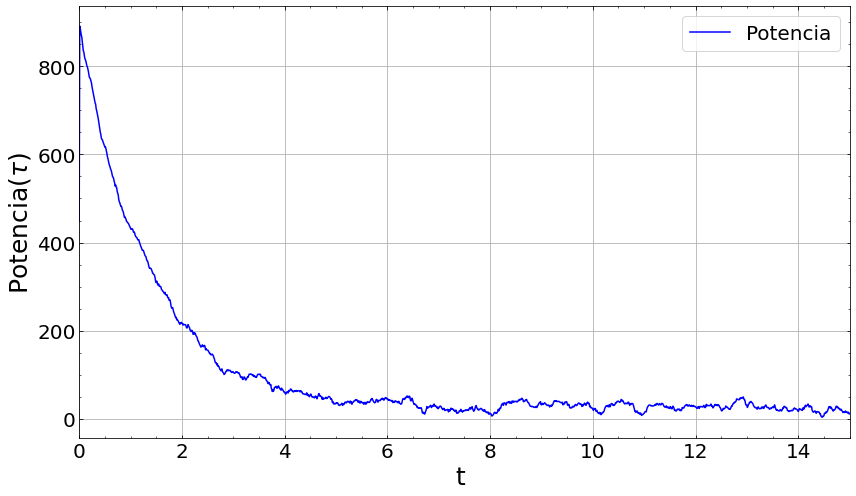

In [192]:
plt.figure(figsize=(12,7))
plt.plot(t, Pow, 'b', label='Potencia')
plt.title('',alpha=1 ,fontsize = '25', color='black')
plt.xlim([0,T*15/100])
plt.xlabel('t ',alpha=1 ,fontsize = '25', color='black')
plt.ylabel('Potencia($\\tau$)',alpha=1 ,fontsize = '25', color='black')
plt.grid()
plt.legend(loc='upper right',fontsize=20)
plt.minorticks_on()
plt.tick_params(bottom=True,top=True,right=True,direction='in',which='both', labelsize = '20', color='black')
plt.tight_layout()